## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

The Scenario

The company you work for is interested in purchasing and operating airplanes for commercial and private enterprises, but know nothing about the potential risks of aircraft.
You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor.

The Data

aviation accident data from 1962 to 2023 about civil aviation accidents 
up to you to decide:
-> what data to use
-> how to deal with missing values
-> how to aggregate (ie. sum, mean, median, count, max..) the data
-> how to visualize it in an interactive dashboard

The Expectation

make 3 recommendations for how the business should move forward
insights to help the head of the new aviation division decide which aircraft to purchase

You should make:

A non-technical presentation (ie. slides)
A Jupyter Notebook
A GitHub repository
An Interactive Dashboard (ie. tableau)

In [72]:
import pandas as pd

In [73]:
aviation_df = pd.read_csv('Aviation_Data.csv')
aviation_df

c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [74]:
aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [75]:
aviation_df['Number.of.Engines'].value_counts()


1.0    69582
2.0    11079
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: Number.of.Engines, dtype: int64

In [76]:
aviation_df.iloc[0:10, [14,15,23,24,25,27]]


,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Weather.Condition
0,Stinson,108-3,2.0,0.0,0.0,UNK
1,Piper,PA24-180,4.0,0.0,0.0,UNK
2,Cessna,172M,3.0,NaN,NaN,IMC
3,Rockwell,112,2.0,0.0,0.0,IMC
4,Cessna,501,1.0,2.0,NaN,VMC
5,Mcdonnell Douglas,DC9,NaN,NaN,1.0,VMC
6,Cessna,180,4.0,0.0,0.0,IMC
7,Cessna,140,0.0,0.0,0.0,VMC
8,Cessna,401B,0.0,0.0,0.0,IMC
9,North American,NAVION L-17B,0.0,0.0,3.0,IMC


In [77]:
aviation_df['Investigation.Type'].value_counts()


Accident      85015
Incident       3874
25-09-2020      702
26-09-2020       60
02-02-2021       39
              ...  
13-09-2021        1
06-01-2021        1
04-03-2021        1
11-02-2021        1
18-11-2020        1
Name: Investigation.Type, Length: 71, dtype: int64

In [78]:
aviation_df['Investigation.Type'].value_counts()['Accident']

85015

In [79]:
aviation_df.loc[aviation_df['Investigation.Type'] == 'Incident', ['Total.Fatal.Injuries']].head(10)

,Total.Fatal.Injuries
23,0.0
40,0.0
79,0.0
80,0.0
119,0.0
131,0.0
149,0.0
191,0.0
194,0.0
279,0.0


In [80]:
aviation_df.loc[aviation_df['Investigation.Type'] == 'Incident', ['Total.Fatal.Injuries']].tail(20)


,Total.Fatal.Injuries
90177,0.0
90183,0.0
90185,0.0
90188,0.0
90191,0.0
90197,0.0
90201,0.0
90211,0.0
90220,0.0
90223,0.0


so seemingly under Investigation.Type, the Accident rows are what's significant to the objective

In [81]:
aviation_df['Weather.Condition'] = aviation_df['Weather.Condition'].str.upper()

In [82]:
weather_accidents = aviation_df.loc[aviation_df['Investigation.Type'] == 'Accident', 'Weather.Condition'].value_counts()
weather_accidents

VMC    75186
IMC     5725
UNK      971
Name: Weather.Condition, dtype: int64

In [83]:
aviation_df['Total.Fatal.Injuries'].isnull().sum()


12860

In [84]:
aviation_df['Make'] = aviation_df['Make'].str.upper()
aviation_df['Model'] = aviation_df['Model'].str.upper()


In [85]:
aviation_df['Model.Count'] = aviation_df['Model'].map(aviation_df['Model'].value_counts())


will impute injury/fatality NaNs with 0

In [86]:
aviation_df['Total.Fatal.Injuries'] = aviation_df['Total.Fatal.Injuries'].fillna(0)
aviation_df['Total.Serious.Injuries'] = aviation_df['Total.Fatal.Injuries'].fillna(0)
aviation_df['Total.Minor.Injuries'] = aviation_df['Total.Minor.Injuries'].fillna(0)
aviation_df['Total.Uninjured'] = aviation_df['Total.Uninjured'].fillna(0)


now confirming the clean

In [87]:
aviation_df['Total.Fatal.Injuries'].isnull().sum()


0

In [88]:
aviation_df['Total.Serious.Injuries'].isnull().sum()


0

In [89]:
aviation_df['Total.Minor.Injuries'].isnull().sum()

0

In [90]:
aviation_df['Total.Uninjured'].isnull().sum()

0

attempting to define a 'severity index' column. giving different 'weight' to death vs serious injury vs minor injury

In [91]:
aviation_df['Severity.Index'] = (
    aviation_df['Total.Fatal.Injuries'] * 5 + 
    aviation_df['Total.Serious.Injuries'] * 3 + 
    aviation_df['Total.Minor.Injuries'] * 1
)

In [92]:
aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date', 'Model.Count', 'Severity.Index'],
      dtype='object')

In [93]:
weather_accidents = aviation_df.loc[aviation_df['Investigation.Type'] == 'Accident', 'Weather.Condition'].value_counts()
weather_accidents_df = weather_accidents.reset_index(name='Accidents.by.Weather')
weather_accidents_df.rename(columns={'index': 'Weather.Condition'}, inplace=True)


weather_fatalities = aviation_df.loc[aviation_df['Investigation.Type'] == 'Accident'].groupby('Weather.Condition')['Total.Fatal.Injuries'].sum().sort_values(ascending=False)
weather_fatalities_df = weather_fatalities.reset_index(name='Fatalities.by.Weather')

In [94]:
weather_severity = weather_accidents_df.merge(weather_fatalities_df, on=['Weather.Condition'], how='inner')
weather_severity


,Weather.Condition,Accidents.by.Weather,Fatalities.by.Weather
0,VMC,75186,25540.0
1,IMC,5725,11823.0
2,UNK,971,2733.0


In [95]:
weather_severity['Weather.Fatality.Rate'] = weather_severity['Fatalities.by.Weather'] / weather_severity['Accidents.by.Weather']
weather_severity


,Weather.Condition,Accidents.by.Weather,Fatalities.by.Weather,Weather.Fatality.Rate
0,VMC,75186,25540.0,0.339691
1,IMC,5725,11823.0,2.065153
2,UNK,971,2733.0,2.814624


Text(0.5, 1.0, 'Accident Severity by Weather Condition')

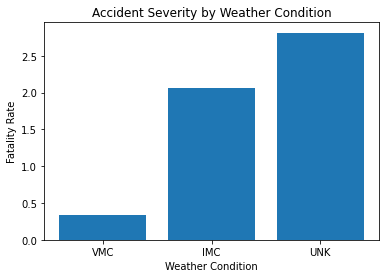

In [96]:
import matplotlib.pyplot as plt

plt.bar(weather_severity['Weather.Condition'], weather_severity['Weather.Fatality.Rate'])
plt.xlabel('Weather Condition')
plt.ylabel('Fatality Rate')
plt.title('Accident Severity by Weather Condition')


so despite vmc (Visual Meteorological Conditions) having the highest number of accidents and the highest number of fatalities in total, it's the weather condition with the lowest fatality rate. more planes just fly in vmc weather, and is relatively safer by accident

In [45]:
weather_severity.to_csv("weather_severity.csv", index=False)

creating 7 new dfs

In [97]:
avg_severity = aviation_df.groupby(['Make','Model'])['Severity.Index'].mean().sort_values(ascending=False)
avg_severity_df = avg_severity.reset_index(name='per.Accident.Severity')


observations_df = (aviation_df.groupby(['Make','Model']).size().reset_index(name='Aircraft.Observations').sort_values('Aircraft.Observations', ascending=False))


accidents_df = (aviation_df[aviation_df['Investigation.Type'] == 'Accident'].groupby(['Make', 'Model']).size().reset_index(name='Aircraft.Accidents')).sort_values('Aircraft.Accidents', ascending=False)


avg_craft_deaths = aviation_df.groupby(['Make','Model'])['Total.Fatal.Injuries'].mean().sort_values(ascending=False)
avg_craft_deaths_df = avg_craft_deaths.reset_index(name='per.Accident.Deaths')


avg_craft_serious = aviation_df.groupby(['Make','Model'])['Total.Serious.Injuries'].mean().sort_values(ascending=False)
avg_craft_serious_df = avg_craft_serious.reset_index(name='per.A.Serious.Injuries')


avg_craft_minor = aviation_df.groupby(['Make','Model'])['Total.Minor.Injuries'].mean().sort_values(ascending=False)
avg_craft_minor_df = avg_craft_minor.reset_index(name='per.A.Minor.Injuries')


avg_craft_uninjured = aviation_df.groupby(['Make','Model'])['Total.Uninjured'].mean().sort_values(ascending=False)
avg_craft_uninjured_df = avg_craft_uninjured.reset_index(name='per.Accident.Uninjured')


In [98]:
avg_severity_df

,Make,Model,per.Accident.Severity
0,TUPOLEV,TU-154,2792.0
1,BOEING,747-168,2792.0
2,BOEING,767-366-ER,1736.0
3,BOEING,777 - 206,1424.0
4,MCDONNELL DOUGLAS,DC-8-62,1392.0
...,...,...,...
18241,JAVRON,PA-18 REPLICA,0.0
18242,JASPER,THUNDERBIRD-2C,0.0
18243,JAQUISH,CHALLENGER SPEC II,0.0
18244,JANNAKOS GREGORY P,ZODIAC 601 HDS,0.0


In [99]:
observations_df

,Make,Model,Aircraft.Observations
4610,CESSNA,152,2366
4634,CESSNA,172,1753
4685,CESSNA,172N,1163
13404,PIPER,PA-28-140,932
4583,CESSNA,150,829
...,...,...,...
7468,EUROCOPTER DEUTSCHLAND,BK117C1,1
7469,EUROCOPTER DEUTSCHLAND,BO-105,1
7470,EUROCOPTER DEUTSCHLAND,BO-105 CBS5,1
7471,EUROCOPTER DEUTSCHLAND,EC 135 P2,1


In [100]:
accidents_df

,Make,Model,Aircraft.Accidents
4219,CESSNA,152,2348
4243,CESSNA,172,1744
4294,CESSNA,172N,1160
12772,PIPER,PA-28-140,929
4192,CESSNA,150,822
...,...,...,...
7111,EXTRA FLUGZEUGBAU,GMBH 300,1
7114,EXTRA FLUGZEUGPRODUKTIONS-GMBH,EA-300/L,1
7115,EXTRA FLUGZEUGPRODUKTIONS-UND,EA 300,1
7117,EXTRA FLUGZEUGRAU GMBH,EA 300/L,1


In [101]:
avg_craft_deaths_df

,Make,Model,per.Accident.Deaths
0,TUPOLEV,TU-154,349.0
1,BOEING,747-168,349.0
2,BOEING,767-366-ER,217.0
3,BOEING,777 - 206,178.0
4,MCDONNELL DOUGLAS,DC-8-62,174.0
...,...,...,...
18241,LIMING LOUIS L,HPL 1 HIGH WING PARA,0.0
18242,LIMES,CHALLENGER II,0.0
18243,LIMA,SKY RAIDER I,0.0
18244,LIGHTNING AVION EAB LLC,ARION LIGHTNING,0.0


In [102]:
avg_craft_serious_df

,Make,Model,per.A.Serious.Injuries
0,TUPOLEV,TU-154,349.0
1,BOEING,747-168,349.0
2,BOEING,767-366-ER,217.0
3,BOEING,777 - 206,178.0
4,MCDONNELL DOUGLAS,DC-8-62,174.0
...,...,...,...
18241,LIMING LOUIS L,HPL 1 HIGH WING PARA,0.0
18242,LIMES,CHALLENGER II,0.0
18243,LIMA,SKY RAIDER I,0.0
18244,LIGHTNING AVION EAB LLC,ARION LIGHTNING,0.0


In [103]:
avg_craft_minor_df

,Make,Model,per.A.Minor.Injuries
0,BOEING,747-2B6B,380.0
1,BOEING,737-297,57.0
2,AIRBUS INDUSTRIE,A340-300,43.0
3,BOEING,747-256,35.0
4,COMMANDER,112TC,30.0
...,...,...,...
18241,MARTIN,STODDARD HAMILTON II,0.0
18242,MARTIN,SORRELL HIPERLIGHT,0.0
18243,MARTIN,SONEX,0.0
18244,MARTIN,RANS S-7 COURIER,0.0


In [104]:
avg_craft_uninjured_df

,Make,Model,per.Accident.Uninjured
0,BOEING,747-4F6B,699.0
1,BOEING,747-SP,699.0
2,MCDONNELL DOUGLAS,MD 83,501.0
3,BOEING,747-130,471.5
4,BOEING,747-243B,459.0
...,...,...,...
18241,DOUGLAS,C54A-DC,0.0
18242,PIPER,PA-22-108/U,0.0
18243,PIPER,PA-20-180,0.0
18244,DOUGLAS,DC-3C/BT-67R,0.0


merging the new dfs, then sorting in order of avg aircraft risk

In [105]:
merged_frame = avg_craft_uninjured_df.merge(avg_craft_minor_df, on=['Make','Model'], how='inner')
merged_frame = merged_frame.merge(avg_craft_serious_df, on=['Make','Model'], how='inner')
merged_frame = merged_frame.merge(avg_craft_deaths_df, on=['Make','Model'], how='inner')
merged_frame = merged_frame.merge(accidents_df, on=['Make','Model'], how='inner')
merged_frame = merged_frame.merge(observations_df, on=['Make','Model'], how='inner')
merged_frame = merged_frame.merge(avg_severity_df, on=['Make','Model'], how='inner')


In [106]:
merged_frame.sort_values('per.Accident.Severity', ascending=False).head(10)


,Make,Model,per.Accident.Uninjured,per.A.Minor.Injuries,per.A.Serious.Injuries,per.Accident.Deaths,Aircraft.Accidents,Aircraft.Observations,per.Accident.Severity
10115,BOEING,747-168,0.0,0.0,349.0,349.0,1,1,2792.0
12528,TUPOLEV,TU-154,0.0,0.0,349.0,349.0,1,1,2792.0
10708,BOEING,767-366-ER,0.0,0.0,217.0,217.0,1,1,1736.0
10715,BOEING,777 - 206,0.0,0.0,178.0,178.0,3,3,1424.0
14918,MCDONNELL DOUGLAS,DC-8-62,0.0,0.0,174.0,174.0,1,1,1392.0
11183,AIRBUS INDUSTRIE,A 310,0.0,10.0,169.0,169.0,1,1,1362.0
11075,AIRBUS,A320 - 216,0.0,0.0,162.0,162.0,1,1,1296.0
708,EMBRAER,E135 LEGACY,7.0,0.0,154.0,154.0,1,1,1232.0
10622,BOEING,MD-83,0.0,0.0,153.0,153.0,1,1,1224.0
534,AIRBUS INDUSTRIE,A310-300,17.0,0.0,124.0,124.0,1,1,992.0


for many of these planes, the severity of the accidents is very high, though the accidents themselves are very rare

this signals to me that for a particular make & model, high accident count doesn’t necessarily mean high avg-severity, and high avg-severity doesn't necessarily mean high accident count

adding new columns to the merged df, then sorting in order of total severity

In [107]:
merged_frame['Total.Severity'] = merged_frame['per.Accident.Severity'] * merged_frame['Aircraft.Accidents']
merged_frame['Total.Aircraft.Deaths'] = merged_frame['per.Accident.Deaths'] * merged_frame['Aircraft.Accidents']
merged_frame['Accident.Rate'] = merged_frame['Aircraft.Accidents'] / merged_frame['Aircraft.Observations']
merged_frame['Mortality.Rate'] = merged_frame['Total.Aircraft.Deaths'] / ((merged_frame['per.Accident.Uninjured'] * merged_frame['Aircraft.Accidents']) + (merged_frame['per.A.Minor.Injuries'] * merged_frame['Aircraft.Accidents']) + (merged_frame['per.A.Serious.Injuries'] * merged_frame['Aircraft.Accidents']) + merged_frame['Total.Aircraft.Deaths'])
merged_frame['Survival.Rate'] = 1 - merged_frame['Mortality.Rate']

In [108]:
merged_frame

,Make,Model,per.Accident.Uninjured,per.A.Minor.Injuries,per.A.Serious.Injuries,per.Accident.Deaths,Aircraft.Accidents,Aircraft.Observations,per.Accident.Severity,Total.Severity,Total.Aircraft.Deaths,Accident.Rate,Mortality.Rate,Survival.Rate
0,BOEING,747-4F6B,699.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0,0.0,1.0
1,BOEING,747-SP,699.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0,0.0,1.0
2,MCDONNELL DOUGLAS,MD 83,501.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0,0.0,1.0
3,BOEING,747-243B,459.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0,0.0,1.0
4,BOEING,777-281,450.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17532,DOUGLAS,C54A-DC,0.0,0.0,2.0,2.0,1,1,16.0,16.0,2.0,1.0,0.5,0.5
17533,PIPER,PA-22-108/U,0.0,2.0,0.0,0.0,1,1,2.0,2.0,0.0,1.0,0.0,1.0
17534,PIPER,PA-20-180,0.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0,NaN,NaN
17535,DOUGLAS,DC-3C/BT-67R,0.0,0.0,4.0,4.0,1,1,32.0,32.0,4.0,1.0,0.5,0.5


In [109]:
severity_index_df = merged_frame.sort_values('Total.Severity', ascending=False).head(20)
severity_index_df

,Make,Model,per.Accident.Uninjured,per.A.Minor.Injuries,per.A.Serious.Injuries,per.Accident.Deaths,Aircraft.Accidents,Aircraft.Observations,per.Accident.Severity,Total.Severity,Total.Aircraft.Deaths,Accident.Rate,Mortality.Rate,Survival.Rate
381,BOEING,737-200,50.283019,1.320755,17.094340,17.094340,35,53,138.075472,4832.641509,598.301887,0.660377,0.199252,0.800748
10715,BOEING,777 - 206,0.000000,0.000000,178.000000,178.000000,3,3,1424.000000,4272.000000,534.000000,1.000000,0.500000,0.500000
4478,CESSNA,172N,1.160791,0.293207,0.368014,0.368014,1160,1163,3.237317,3755.288048,426.895959,0.997420,0.168041,0.831959
4290,CESSNA,172,1.283514,0.223046,0.227039,0.227039,1744,1753,2.039361,3556.645750,395.956646,0.994866,0.115799,0.884201
8724,CESSNA,152,0.999155,0.177937,0.164835,0.164835,2348,2366,1.496619,3514.060862,387.032967,0.992392,0.109397,0.890603
4393,PIPER,PA-28-181,1.215501,0.347826,0.718336,0.718336,525,529,6.094518,3199.621928,377.126654,0.992439,0.239445,0.760555
374,BOEING,737,52.026585,0.186094,2.756646,2.756646,135,489,22.239264,3002.300613,372.147239,0.276074,0.047754,0.952246
8808,PIPER,PA-28-140,0.905579,0.436695,0.344421,0.344421,929,932,3.192060,2965.423820,319.966738,0.996781,0.169572,0.830428
12528,TUPOLEV,TU-154,0.000000,0.000000,349.000000,349.000000,1,1,2792.000000,2792.000000,349.000000,1.000000,0.500000,0.500000
10115,BOEING,747-168,0.000000,0.000000,349.000000,349.000000,1,1,2792.000000,2792.000000,349.000000,1.000000,0.500000,0.500000


In [110]:
severity_index_df_copy = severity_index_df.copy()

severity_index_df_copy['Aircraft'] = severity_index_df_copy['Make'] + ' ' + severity_index_df_copy['Model']


In [111]:
severity_index_df_copy.to_csv("totalseveritybyplane.csv", index=False)

the plane with the most fatalities had 35 accidents, and an accident rate of 0.66. numbers 3-5 had 1160, 1744 and 2348 respectively, with accident rates of 0.99
so the total severity from accidents for planes with low average severity adds up if they crash frequently enough

In [112]:
merged_frame.columns

Index(['Make', 'Model', 'per.Accident.Uninjured', 'per.A.Minor.Injuries',
       'per.A.Serious.Injuries', 'per.Accident.Deaths', 'Aircraft.Accidents',
       'Aircraft.Observations', 'per.Accident.Severity', 'Total.Severity',
       'Total.Aircraft.Deaths', 'Accident.Rate', 'Mortality.Rate',
       'Survival.Rate'],
      dtype='object')

In [113]:
merged_frame.corr()

,per.Accident.Uninjured,per.A.Minor.Injuries,per.A.Serious.Injuries,per.Accident.Deaths,Aircraft.Accidents,Aircraft.Observations,per.Accident.Severity,Total.Severity,Total.Aircraft.Deaths,Accident.Rate,Mortality.Rate,Survival.Rate
per.Accident.Uninjured,1.000000,0.234622,0.016673,0.016673,-0.007043,0.002043,0.022021,0.040957,0.037886,-0.373401,-0.115768,0.115768
per.A.Minor.Injuries,0.234622,1.000000,0.016264,0.016264,-0.003190,-0.001223,0.039093,0.032918,0.020303,-0.092705,-0.143672,0.143672
per.A.Serious.Injuries,0.016673,0.016264,1.000000,1.000000,-0.004594,-0.003497,0.999739,0.468237,0.491546,-0.039951,0.176527,-0.176527
per.Accident.Deaths,0.016673,0.016264,1.000000,1.000000,-0.004594,-0.003497,0.999739,0.468237,0.491546,-0.039951,0.176527,-0.176527
Aircraft.Accidents,-0.007043,-0.003190,-0.004594,-0.004594,1.000000,0.996470,-0.004664,0.668816,0.635458,-0.007285,0.006818,-0.006818
Aircraft.Observations,0.002043,-0.001223,-0.003497,-0.003497,0.996470,1.000000,-0.003522,0.683321,0.650754,-0.031284,0.005301,-0.005301
per.Accident.Severity,0.022021,0.039093,0.999739,0.999739,-0.004664,-0.003522,1.000000,0.468693,0.491699,-0.042043,0.173160,-0.173160
Total.Severity,0.040957,0.032918,0.468237,0.468237,0.668816,0.683321,0.468693,1.000000,0.998553,-0.094275,0.104720,-0.104720
Total.Aircraft.Deaths,0.037886,0.020303,0.491546,0.491546,0.635458,0.650754,0.491699,0.998553,1.000000,-0.094615,0.111151,-0.111151
Accident.Rate,-0.373401,-0.092705,-0.039951,-0.039951,-0.007285,-0.031284,-0.042043,-0.094275,-0.094615,1.000000,0.074490,-0.074490


creating a crash_survival df that filters the merged df for a threshold number of accidents, people uninjured per accident and total aircraft deaths for each aircraft

In [114]:
filtered_survival = merged_frame.loc[
    (merged_frame['Aircraft.Accidents'] >= 20) &
    (merged_frame['Total.Aircraft.Deaths'] <= 2)
]

best_survivability = filtered_survival.sort_values('Survival.Rate', ascending=False).head(40)
best_survivability


,Make,Model,per.Accident.Uninjured,per.A.Minor.Injuries,per.A.Serious.Injuries,per.Accident.Deaths,Aircraft.Accidents,Aircraft.Observations,per.Accident.Severity,Total.Severity,Total.Aircraft.Deaths,Accident.Rate,Mortality.Rate,Survival.Rate
251,BOEING,777,99.147368,0.242105,0.000000,0.000000,23,95,0.242105,5.568421,0.000000,0.242105,0.000000,1.000000
4162,HILLER,UH-12B,1.363636,0.136364,0.000000,0.000000,22,22,0.136364,3.000000,0.000000,1.000000,0.000000,1.000000
4613,AVIAT AIRCRAFT INC,A-1B,1.045455,0.090909,0.000000,0.000000,22,22,0.090909,2.000000,0.000000,1.000000,0.000000,1.000000
4530,LET,BLANIK L-13,1.117647,0.176471,0.000000,0.000000,34,34,0.176471,6.000000,0.000000,1.000000,0.000000,1.000000
8809,GRUMMAN,G164B,0.904762,0.095238,0.000000,0.000000,21,21,0.095238,2.000000,0.000000,1.000000,0.000000,1.000000
4444,EVEKTOR-AEROTECHNIK AS,SPORTSTAR,1.190476,0.095238,0.000000,0.000000,21,21,0.095238,2.000000,0.000000,1.000000,0.000000,1.000000
4374,ROBINSON HELICOPTER,R22,1.238095,0.047619,0.000000,0.000000,21,21,0.047619,1.000000,0.000000,1.000000,0.000000,1.000000
8751,SCHWEIZER,SGS-2-33A,0.952381,0.285714,0.000000,0.000000,21,21,0.285714,6.000000,0.000000,1.000000,0.000000,1.000000
9082,GRUMMAN-SCHWEIZER,G-164A,0.720000,0.240000,0.000000,0.000000,50,50,0.240000,12.000000,0.000000,1.000000,0.000000,1.000000
4620,PIPER,PA 18,1.037037,0.148148,0.000000,0.000000,27,27,0.148148,4.000000,0.000000,1.000000,0.000000,1.000000


In [115]:
filtered_survival.shape[0]

43

In [116]:
filtered_survival['Make'].value_counts()['BOEING']

4

In [117]:
filtered_survival['Make'].value_counts()

PIPER                             6
BOEING                            4
CESSNA                            3
ENSTROM                           2
WEATHERLY                         2
HILLER                            2
SCHWEIZER                         2
BELL                              2
BEECH                             2
AIR TRACTOR INC                   2
ROBINSON HELICOPTER               1
LET                               1
AERONCA                           1
ROCKWELL INTERNATIONAL            1
EAGLE AIRCRAFT CO.                1
MAULE                             1
CHAMPION                          1
GRUMMAN ACFT ENG COR-SCHWEIZER    1
AVIAT AIRCRAFT INC                1
ROCKWELL                          1
CONSOLIDATED AERONAUTICS INC.     1
GRUMMAN-SCHWEIZER                 1
GRUMMAN                           1
FLIGHT DESIGN GMBH                1
BRANTLY HELICOPTER                1
EVEKTOR-AEROTECHNIK AS            1
Name: Make, dtype: int64

In [118]:
boeing_models = filtered_survival.loc[filtered_survival['Make'] == 'BOEING']
boeing_models

,Make,Model,per.Accident.Uninjured,per.A.Minor.Injuries,per.A.Serious.Injuries,per.Accident.Deaths,Aircraft.Accidents,Aircraft.Observations,per.Accident.Severity,Total.Severity,Total.Aircraft.Deaths,Accident.Rate,Mortality.Rate,Survival.Rate
251,BOEING,777,99.147368,0.242105,0.000000,0.000000,23,95,0.242105,5.568421,0.000000,0.242105,0.000000,1.000000
355,BOEING,747,59.200000,0.117647,0.070588,0.070588,20,85,0.682353,13.647059,1.411765,0.235294,0.001187,0.998813
4178,BOEING,A75N1(PT17),1.343750,0.250000,0.062500,0.062500,32,32,0.750000,24.000000,2.000000,1.000000,0.036364,0.963636
4303,BOEING,E75,1.270270,0.270270,0.054054,0.054054,37,37,0.702703,26.000000,2.000000,1.000000,0.032787,0.967213


In [119]:
best_survivability_copy = best_survivability.copy()

best_survivability_copy['Aircraft'] = best_survivability_copy['Make'] + ' ' + best_survivability_copy['Model']

In [120]:
best_survivability_copy.to_csv("bestsurvivabilitybyplane.csv", index=False)

creating an accident_rate df that filters the merged df for aircraft that meet a threshold number of observations 

In [121]:
safe_flights = merged_frame.loc[
    (merged_frame['Aircraft.Observations'] >= 200)
]

looow_acc_rate = safe_flights.sort_values('Accident.Rate', ascending=True).head(40)
looow_acc_rate

,Make,Model,per.Accident.Uninjured,per.A.Minor.Injuries,per.A.Serious.Injuries,per.Accident.Deaths,Aircraft.Accidents,Aircraft.Observations,per.Accident.Severity,Total.Severity,Total.Aircraft.Deaths,Accident.Rate,Mortality.Rate,Survival.Rate
374,BOEING,737,52.026585,0.186094,2.756646,2.756646,135,489,22.239264,3002.300613,372.147239,0.276074,0.047754,0.952246
1751,PIPER,PA-31-350,2.125000,0.317857,0.846429,0.846429,259,280,7.089286,1836.125000,219.225000,0.925000,0.204663,0.795337
3850,PIPER,PA-34-200T,1.570093,0.247664,0.682243,0.682243,204,214,5.705607,1163.943925,139.177570,0.953271,0.214391,0.785609
4377,BEECH,58,1.235537,0.115702,0.896694,0.896694,231,242,7.289256,1683.818182,207.136364,0.954545,0.285151,0.714849
4147,CESSNA,172RG,1.387755,0.195918,0.383673,0.383673,237,245,3.265306,773.877551,90.930612,0.967347,0.163194,0.836806
4514,CESSNA,172S,1.129380,0.107817,0.210243,0.210243,361,371,1.789757,646.102426,75.897574,0.973046,0.126829,0.873171
4490,CESSNA,177RG,1.148305,0.305085,0.411017,0.411017,230,236,3.593220,826.440678,94.533898,0.974576,0.180633,0.819367
4560,MOONEY,M20C,1.094340,0.344340,0.438679,0.438679,207,212,3.853774,797.731132,90.806604,0.976415,0.189409,0.810591
1764,CESSNA,185,2.050179,0.218638,0.240143,0.240143,273,279,2.139785,584.161290,65.559140,0.978495,0.087353,0.912647
8725,MOONEY,M20J,0.996516,0.285714,0.557491,0.557491,281,287,4.745645,1333.526132,156.655052,0.979094,0.232558,0.767442


In [122]:
looow_acc_rate_copy = looow_acc_rate.copy()

looow_acc_rate_copy['Aircraft'] = looow_acc_rate_copy['Make'] + ' ' + looow_acc_rate_copy['Model']

In [123]:
looow_acc_rate_copy.to_csv("least_acc_rate_planes.csv", index=False)

In [214]:
merged_frame.to_csv("merged_frame.csv", index=False)